In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_management import load_tsv
from data_utils import string_encoding_to_datetime, select_by_dict, get_df_with_split_time, print_unique_values
plt.rcParams['figure.figsize'] = 20, 16

In [5]:
# Nights spent at tourist accommodation establishments - monthly data
nights_spent = load_tsv("tour_occ_nim.tsv", decode=True)
print_unique_values(nights_spent)

c_resid
	Foreign country
	Reporting country
	Total
unit
	Number
	Percentage change compared to same period in previous year
nace_r2
	Hotels and similar accommodation
	Hotels; holiday and other short-stay accommodation; camping grounds, recreational vehicle parks and trailer parks
	Holiday and other short-stay accommodation
	Holiday and other short-stay accommodation; camping grounds, recreational vehicle parks and trailer parks
	Camping grounds, recreational vehicle parks and trailer parks
geo
	Albania
	Austria
	Belgium
	Bulgaria
	Switzerland
	Cyprus
	Czechia
	Germany (until 1990 former territory of the FRG)
	Denmark
	Euro area (EA11-2000, EA12-2006, EA13-2007, EA15-2008, EA16-2010, EA17-2013, EA18-2014, EA19)
	Estonia
	Greece
	Spain
	European Union - 27 countries (2007-2013)
	European Union - 28 countries
	Finland
	France
	Croatia
	Hungary
	Ireland
	Iceland
	Italy
	Liechtenstein
	Lithuania
	Luxembourg
	Latvia
	Montenegro
	North Macedonia
	Malta
	Netherlands
	Norway
	Poland
	Portugal
	

C:\Users\tonym\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


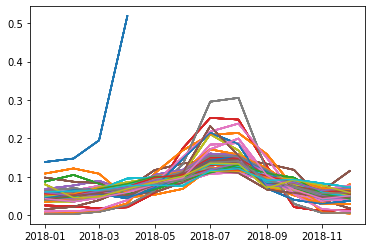

                                                     geo     time     value
26194                                            Croatia  2018M02  0.003727
26188                                             Greece  2018M02  0.005376
26203                                         Montenegro  2018M02  0.011011
26182                                             Cyprus  2018M02  0.022177
26180                                           Bulgaria  2018M02  0.023524
26213                                           Slovenia  2018M02  0.035756
26204                                    North Macedonia  2018M02  0.036008
26185                                            Denmark  2018M02  0.036322
26198                                              Italy  2018M02  0.042490
26193                                             France  2018M02  0.042717
26201                                         Luxembourg  2018M02  0.042838
26215                                     United Kingdom  2018M02  0.045963
26200       

In [6]:
"""
Description:
    Percentage of total annual travel for each month, per country, in 2018
    X: Time
    Y: Percent of annual bed occupancy
Results:
    No exceptions to the general rule, including countries with a focus on winter activities like skiing
    Some small warmer places are not hit as hard
    Albania has terrible data
"""
sub = select_by_dict(nights_spent, {
    "c_resid": "Foreign country",
    "unit": "Number",
    "nace_r2": "Hotels; holiday and other short-stay accommodation; camping grounds, recreational vehicle parks and trailer parks"
})
sub = sub[sub["time"].str.startswith("2018")]
sub["value"] = sub["value"] / sub.groupby('geo')["value"].transform(np.sum)
for geo in sub["geo"]:
    single = sub[sub["geo"] == geo]
    plt.plot(single["time"].apply(string_encoding_to_datetime), single["value"], label=geo)
# plt.legend()
plt.show()
print(sub[sub["time"] == "2018M02"].sort_values("value"))

geo                                                                                            year
Czechia                                                                                        2018    0.015631
Kosovo (under United Nations Security Council Resolution 1244/99)                              2018    0.019347
Poland                                                                                         2018    0.021195
Germany (until 1990 former territory of the FRG)                                               2018    0.021553
Belgium                                                                                        2018    0.022383
Finland                                                                                        2018    0.023102
Malta                                                                                          2018    0.023792
Romania                                                                                        2018    0.024658
Liec

(array([ 2.,  8., 10.,  3.,  4.,  1.,  4.,  2.,  1.,  0.,  0.,  0.,  2.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([0.01563105, 0.02112346, 0.02661586, 0.03210827, 0.03760067,
        0.04309307, 0.04858548, 0.05407788, 0.05957028, 0.06506269,
        0.07055509, 0.07604749, 0.0815399 , 0.0870323 , 0.0925247 ,
        0.09801711, 0.10350951, 0.10900191, 0.11449432, 0.11998672,
        0.12547912, 0.13097153, 0.13646393, 0.14195633, 0.14744874,
        0.15294114, 0.15843354, 0.16392595, 0.16941835, 0.17491075,
        0.18040316]),
 <a list of 30 Patch objects>)

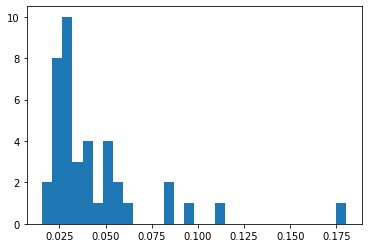

In [7]:
temp = get_df_with_split_time(sub)
temp["value"] = temp["value"].astype(float)
temp = temp[temp["year"] == 2018]
stds = temp.groupby(["geo", "year"])["value"].std().sort_values()
print(stds)
plt.hist(stds, bins=30)

In [12]:
employed = load_tsv("tour_lfsq1r2.tsv", decode=True)
print_unique_values(employed)

nace_r2
	Air transport
	Accommodation and food service activities
	Air transport; accommodation; travel agency, tour operator reservation service and related activities
	Travel agency, tour operator and other reservation service and related activities
	Total - all NACE activities
wstatus
	Contributing family workers
	Employed persons
	No response
	Employees
	Self-employed persons
worktime
	Full-time
	Part-time
	Total
	No response
unit
	Thousand
geo
	Czechia
	Germany (until 1990 former territory of the FRG)
	Euro area (19 countries)
	European Union - 15 countries (1995-2004)
	European Union - 28 countries
	Ireland
	Italy
	Luxembourg
	Netherlands
	Belgium
	United Kingdom
	Austria
	Bulgaria
	Switzerland
	Cyprus
	Denmark
	Estonia
	Greece
	Spain
	Finland
	France
	Croatia
	Hungary
	Iceland
	Lithuania
	Latvia
	Montenegro
	North Macedonia
	Malta
	Norway
	Poland
	Portugal
	Romania
	Serbia
	Sweden
	Slovenia
	Slovakia
	Turkey
time
	2019Q3
	2019Q2
	2019Q1
	2018Q4
	2018Q3
	2018Q2
	2018Q1
	2017Q4
	2

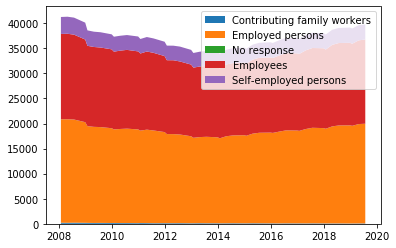

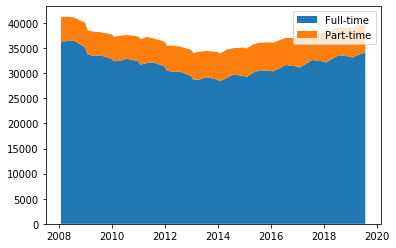

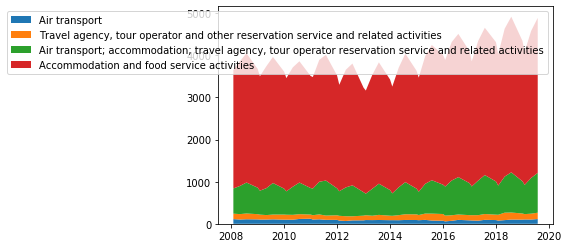

In [13]:
"""
Description:
    Employment by various types, and how they make up the whole in Spain
    The last plot (nace_r2) does not add up to the whole, other other known industries are not plotted
    X: Time
    Y: Number of workers, as found by the EU labour force survey
Results:
    Overall employment in tourism related areas not too affected, at least at first gland
    Noticible monthly trends exist
    Some areas such as air travel and accomedations are heavily affected
    Overall employment went downwards until 2014, after which it start to climb
"""
sub = select_by_dict(employed, {"unit": "Thousand", "geo": "Spain"})
def plot_layered_by_field(layered_field, values_to_layer):
    temp = sub.copy()
    if layered_field != "nace_r2":
        temp = temp[temp["nace_r2"] == "Total - all NACE activities"]
    if layered_field != "worktime":
        temp = temp[temp["worktime"] == "Total"]
    if layered_field != "wstatus":
        temp = temp.groupby([col for col in temp if col not in ["wstatus", "value"]]).sum().reset_index()
    
    layers = [
        temp[temp[layered_field] == v] for v in values_to_layer
    ]
    layers = [l for l in layers if len(l) != 0]
    
    plt.stackplot(
        layers[0]["time"].apply(string_encoding_to_datetime),
        *[l[l["time"].values == layers[0]["time"].values]["value"].astype(float) for l in layers],
        labels=values_to_layer)
    plt.legend()
    plt.show()
plot_layered_by_field(
        "wstatus",
        [
            "Contributing family workers", "Employed persons", "No response", "Employees", "Self-employed persons"
        ]
)
plot_layered_by_field(
        "worktime",
        [
            "Full-time", "Part-time"
        ]
)
plot_layered_by_field(
        "nace_r2",
        [
            "Air transport",
            "Travel agency, tour operator and other reservation service and related activities",
            "Air transport; accommodation; travel agency, tour operator reservation service and related activities",
            "Accommodation and food service activities",
        ]
)

In [14]:
temp_df = select_by_dict(sub, {
    "nace_r2": "Air transport",
    "wstatus": "Employed persons",
    "worktime": "Total",
})
temp_df

,time,value
121,2019Q3,56.5
2548,2019Q2,50.9
4975,2019Q1,51.6
7402,2018Q4,49.7
9829,2018Q3,50.8
12256,2018Q2,44.2
14683,2018Q1,38.2
17110,2017Q4,44.5
19537,2017Q3,47.1
21964,2017Q2,37.1


C:\Users\tonym\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


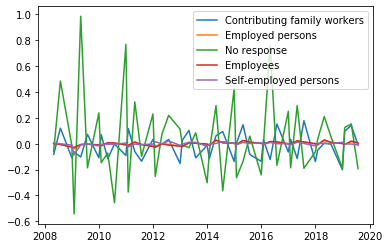

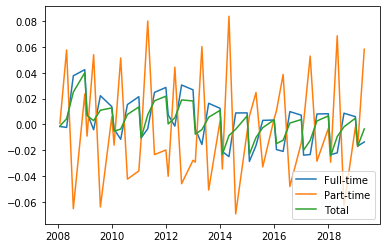

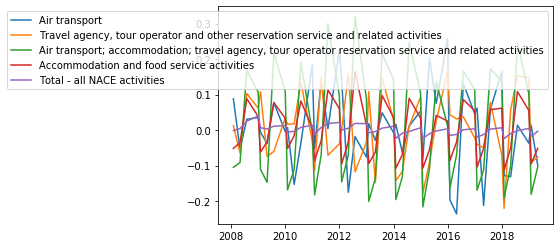

In [15]:
"""
Description:
    Quarter to quarter change in employment rates, under types of employment and sector
    X: Time
    Y: % change in number of workers, as found by the EU labour force survey
Results:
    No reponse for workstatus workers can as much as double or halve their numbers between single periods
    Part-time employees are affected more by seasonality than full time, and lose 6% ro gain 8% within a single period
    Between the different tourism sectors
    Total change of sector is always more stable than any of the indidivual parts
"""

sub = select_by_dict(employed, {"unit": "Thousand", "geo": "Spain"})
def plot_percent_change_by_field(layered_field, values_to_layer):
    temp = sub.copy()
    if layered_field != "nace_r2":
        temp = temp[temp["nace_r2"] == "Total - all NACE activities"]
    if layered_field != "worktime":
        temp = temp[temp["worktime"] == "Total"]
    if layered_field != "wstatus":
        temp = temp.groupby([col for col in temp if col not in ["wstatus", "value"]]).sum().reset_index()
    
    for v in values_to_layer:
        curr_layer = temp[temp[layered_field] == v]
        if len(curr_layer) == 0:
            continue
        curr_layer.iloc[:-1, :]["value"] = (curr_layer.iloc[:-1, :]["value"].values - curr_layer.iloc[1:, :]["value"].values) / curr_layer.iloc[1:, :]["value"].values
        curr_layer = curr_layer.iloc[:-1, :]
        
        plt.plot(
            curr_layer["time"].apply(string_encoding_to_datetime),
            curr_layer["value"].values.astype(float),
            label=v
        )
    
    plt.legend()
    plt.show()
    
plot_percent_change_by_field(
        "wstatus",
        [
            "Contributing family workers", "Employed persons", "No response", "Employees", "Self-employed persons"
        ]
)
plot_percent_change_by_field(
        "worktime",
        [
            "Full-time", "Part-time", "Total"
        ]
)
plot_percent_change_by_field(
        "nace_r2",
        [
            "Air transport",
            "Travel agency, tour operator and other reservation service and related activities",
            "Air transport; accommodation; travel agency, tour operator reservation service and related activities",
            "Accommodation and food service activities",
            "Total - all NACE activities"
        ]
)

In [16]:
temp_df.iloc[:-1, :]["value"] = (temp_df.iloc[:-1, :]["value"].values - temp_df.iloc[1:, :]["value"].values) / temp_df.iloc[1:, :]["value"].values
temp_df

C:\Users\tonym\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,time,value
121,2019Q3,0.110020
2548,2019Q2,-0.013566
4975,2019Q1,0.038229
7402,2018Q4,-0.021654
9829,2018Q3,0.149321
12256,2018Q2,0.157068
14683,2018Q1,-0.141573
17110,2017Q4,-0.055202
19537,2017Q3,0.269542
21964,2017Q2,-0.058376
